# Sentiment Analysis on IMDB dataset

# Importing libraries

In [63]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('IMDB Dataset.csv')

In [65]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [66]:
df = df.sample(frac=1).reset_index(drop=True)
df

,review,sentiment
0,This movie tries to be more than it is. First ...,negative
1,This film just goes to prove that not every fi...,negative
2,Only three words are really required for this ...,negative
3,It is clear this film's value far supersedes t...,positive
4,Though I liked On the Town better I really lik...,positive
...,...,...
49995,Well the main reason I tuned in to watch this ...,positive
49996,"If I write a review about a movie, maybe it wi...",negative
49997,I was never so bored in my life. Hours of pret...,negative
49998,Eastenders has gone full circle from unmissabl...,negative


In [67]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [70]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [71]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [72]:
class EDA():
    def get_length_dist(self,data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist()
        plt.title('Number of types of commets')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())
    def get_class_dist(self,df):
        df['sentiment'].replace({1:'positive',0:'negative'}).value_counts().plot(kind='bar',figsize=(7,4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()

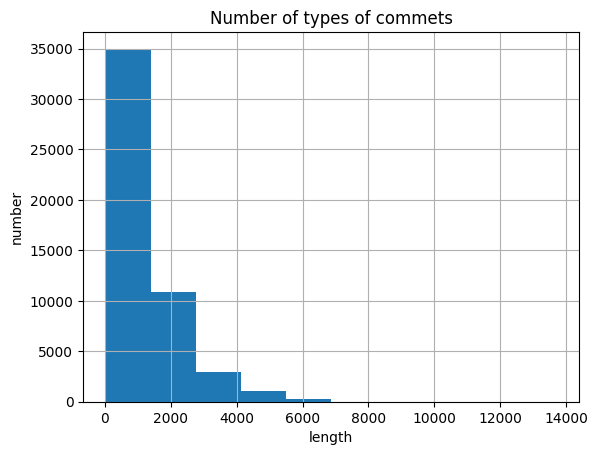

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
dtype: float64


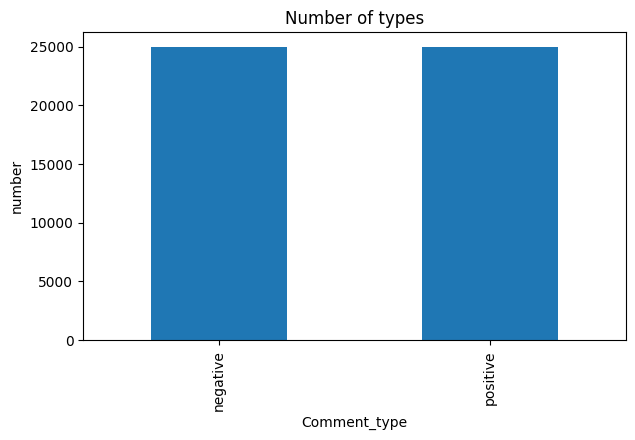

In [73]:
eda = EDA()
eda.get_length_dist(df['review'])
eda.get_class_dist(df)

# Preprocess the data

In [74]:
def preprocess_text(text):
    # Remove HTML tags and strip whitespace
    text = re.sub(r'<[^>]*>', '', text)
    text = text.strip()

    # Remove noisy characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Lowercase text
    text = text.lower()

    # Tokenize text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [75]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
df['review'].head(30)

,review
0,movie tries first acting horrible get past inc...
1,film goes prove every film made glory days hol...
2,three words really required review piece crapi...
3,clear films value far supersedes cost format m...
4,though liked town better really liked im new c...
5,slaughter high totally ridiculous slasher flic...
6,seen film sunday evening must say better way e...
7,rented flick one reason tom savini respect wor...
8,movie plain confusing slow uninteresting alien...
9,suspenseful giallo director lanticristo1974thi...


In [77]:
x = df['review']
y = df['sentiment']

In [78]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
y = label_encode.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 0, 0, 1])

In [79]:
y

array([0, 0, 0, ..., 0, 0, 1])

 # 0 represent negative comments and 1 represent positive comments

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
from collections import Counter
word_counts = Counter(' '.join(xtrain).split())

# TF-IDF Vectorization

In [84]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [85]:
# for training data set

from timeit import Timer

timer = Timer()
import timeit

start = timer.timeit(number=1)

tfidf_vectorizer_xtrain = []
batch_size = 1000
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer.timeit(number=1) - start)

Required time for embedding TFIDF with train data:-  2.399974619038403e-08


Repeat the same process for test data

In [86]:
import time

start = time.time()
tfidf_vectorizer_xtest = []
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', time.time() - start)

Required time for embedding TFIDF with train data:-  1.7092292308807373


Logistic Regression

In [87]:
from timeit import default_timer as timer
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)

start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Logistic Regression classifiers:- ', timer() - start)

Required time for training Logistic Regression classifiers:-  9.639252654999837


In [88]:
start = timer()
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Logistic Regression prediction:- ', timer() - start)

Required time for Logistic Regression prediction:-  0.243765324999913


Print actual vs. predicted results for Logistic Regression

In [89]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0



In [90]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)


Logistic Regression Accuracy: 0.68
Logistic Regression Precision: 0.67
Logistic Regression Recall: 0.71
Logistic Regression F1 score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      5002
           1       0.67      0.71      0.69      4998

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



Display accuracy

In [91]:
model_name = ['LogisticRegression']
model_accuracie = [ accuracy_lr]

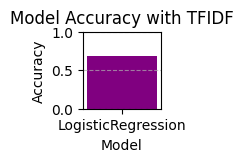

In [92]:
plt.figure(figsize=(1, 1))
plt.bar(model_name, model_accuracie, color=['purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy with TFIDF")
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()